### Importing the requried libraries

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import csv
import tensorflow.keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.layers.embeddings import Embedding
from keras.layers import Dropout


### Mounting the Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the data from csv file

In [0]:
df = pd.read_csv('/content/drive/My Drive/finalcleandataTraining.csv')
#print(df.head())
xdata = df['message']
y_label = df[["toxic", "obscene", "insult", "racism", "sexism"]]
ydata = y_label.values

### Splitting the data into Training & Testing

In [0]:
xtrain,xtest,y_train,ytest = train_test_split(xdata,ydata,test_size=0.2) 

### Creating the embedding dictionary

In [0]:
maxlen = 64
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1

embeddings_dictionary = dict()
glove_file = open('/content/drive/My Drive/Prj/glove.twitter.27B.200d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:])
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

### Creating the embedding matrix from embedding dictionary

In [0]:
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

### Creating the model

In [11]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(32, return_sequences=True)(embedding_layer)
LSTM_Layer_2 = LSTM(32, return_sequences=True)(LSTM_Layer_1)
Dropout_Layer = Dropout(0.5)(LSTM_Layer_2)
LSTM_Layer_3 = LSTM(32)(Dropout_Layer)
dense_layer_1 = Dense(5, activation='sigmoid')(LSTM_Layer_3)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 64, 200)           7391000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 64, 32)            29824     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64, 32)            8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165 

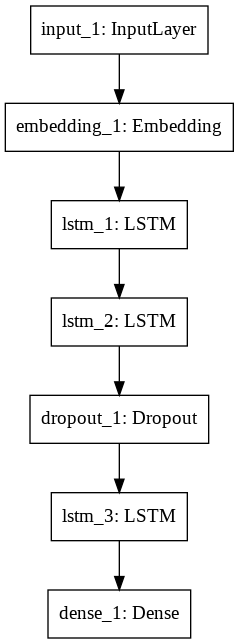

In [12]:
model.summary()
plot_model(model, to_file='model.png')

### Training the model

In [13]:
X_train = tokenizer.texts_to_sequences(xtrain)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
history = model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.2)



Train on 8988 samples, validate on 2248 samples
Epoch 1/20
8988/8988 [==============================] - 15s 2ms/step - loss: 0.5662 - acc: 0.7979 - val_loss: 0.4692 - val_acc: 0.8136
Epoch 2/20
8988/8988 [==============================] - 11s 1ms/step - loss: 0.4652 - acc: 0.8128 - val_loss: 0.4530 - val_acc: 0.8136
Epoch 3/20
8988/8988 [==============================] - 11s 1ms/step - loss: 0.4485 - acc: 0.8128 - val_loss: 0.4352 - val_acc: 0.8136
Epoch 4/20
8988/8988 [==============================] - 11s 1ms/step - loss: 0.4259 - acc: 0.8129 - val_loss: 0.3873 - val_acc: 0.8136
Epoch 5/20
8988/8988 [==============================] - 11s 1ms/step - loss: 0.3686 - acc: 0.8298 - val_loss: 0.3969 - val_acc: 0.8419
Epoch 6/20
8988/8988 [==============================] - 11s 1ms/step - loss: 0.3475 - acc: 0.8449 - val_loss: 0.3338 - val_acc: 0.8513
Epoch 7/20
8988/8988 [==============================] - 11s 1ms/step - loss: 0.3446 - acc: 0.8464 - val_loss: 0.3287 - val_acc: 0.8550
Epoch

Saving the Model

In [0]:
model.save('Model3.h5')

### Testing and evaluating the model

In [15]:
X_test = tokenizer.texts_to_sequences(xtest)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_test)
print(model.metrics_names)
model.evaluate(X_test,ytest, batch_size=128)

[[  97   15 2802 ...    0    0    0]
 [  63    8  304 ...    0    0    0]
 [ 110  175  155 ...    0    0    0]
 ...
 [ 664   95    9 ...    0    0    0]
 [ 312 7857 2954 ...    0    0    0]
 [  79   19    9 ...    0    0    0]]
['loss', 'acc']
2810/2810 [==============================] - 2s 853us/step


[0.20809779976398496, 0.9188612055948197]

In [17]:
testdata = pd.read_csv('/content/Testing6.csv')
print(testdata['message'])
testdata = tokenizer.texts_to_sequences(testdata['message'])
testdata = pad_sequences(testdata, padding='post', maxlen=maxlen)
print(testdata)
model.predict(testdata)

0      Hello Good Morning
1              i hate you
2              i love you
3    I will eat you bitch
4         Muslims are gay
Name: message, dtype: object
[[ 548  114 2387    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   6  284    2    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   6  435    2    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    

array([[0.0704461 , 0.01042864, 0.00777665, 0.04885197, 0.13487756],
       [0.87609506, 0.624993  , 0.5030818 , 0.01678118, 0.01514062],
       [0.6648596 , 0.29387894, 0.3334275 , 0.03355342, 0.05476388],
       [0.8979062 , 0.6807133 , 0.53786105, 0.01619595, 0.01250312],
       [0.01251346, 0.00679821, 0.00322828, 0.55548716, 0.09825001]],
      dtype=float32)

In [0]:
y_pred = model.predict(X_test)

### Results

In [20]:
from sklearn.metrics import roc_auc_score, multilabel_confusion_matrix
roc_auc_score(ytest,y_pred)


0.9433302831805165

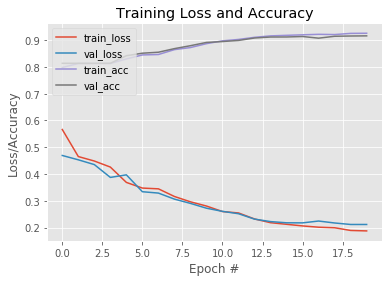

In [23]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
N = 20
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
#plt.savefig(args["plot"])

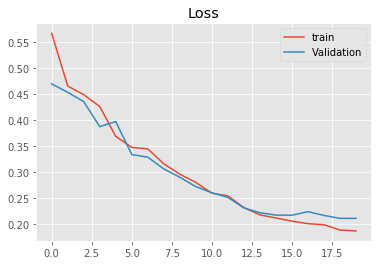

In [24]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

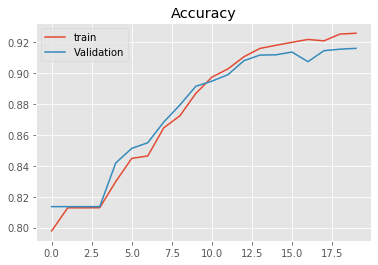

In [25]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='Validation')
plt.legend()
plt.show();